In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import copy
from IPython.display import display
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
data_activity_dir = "../data/acf/df_activity_30m.txt"
data_temperature_dir = "../data/acf/t001_1h.txt"

df_activity_30m = pd.read_csv(
    data_activity_dir,
    delimiter=",",
    header=0,
    parse_dates=True,
)

df_t001_1h = pd.read_csv(
    data_temperature_dir,
    delimiter=",",
    header=0,
    parse_dates=True,
)

df_activity_30m["DateTime_ISO8601"] = pd.to_datetime(df_activity_30m["DateTime_ISO8601"], format="ISO8601")
df_t001_1h["DateTime_ISO8601"] = pd.to_datetime(df_t001_1h["DateTime_ISO8601"], format="ISO8601")

##### ÜBUNG: AUTOKORRELATIONSFUNKTION 

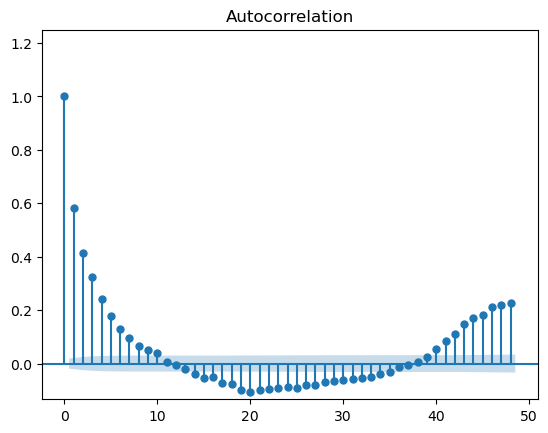

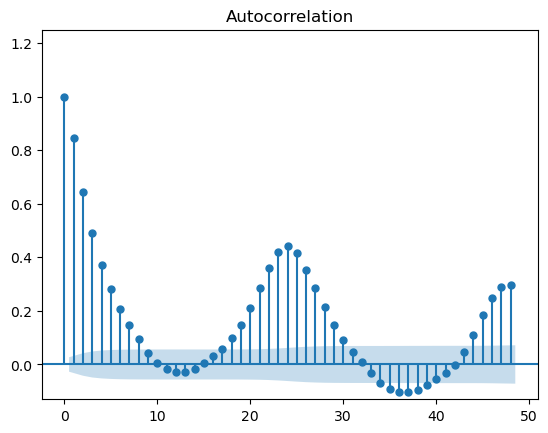

In [19]:
_ = plot_acf(df_activity_30m["Activity"], lags=48, auto_ylims=True)
_ = plot_acf(df_t001_1h["Value_num"], lags=48, auto_ylims=True)

##### ÜBUNG: KLASSISCHE DEKOMPOSITION

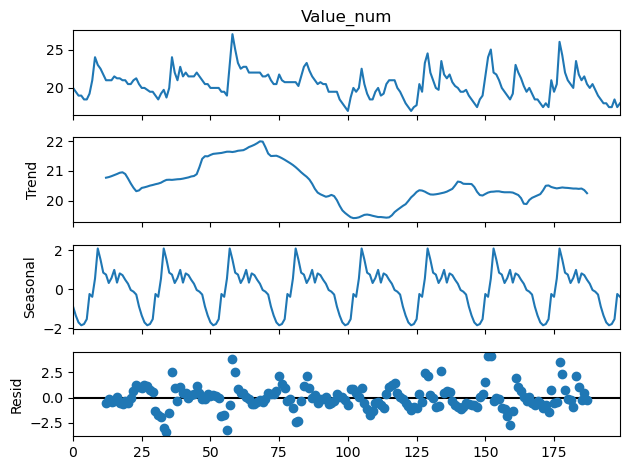

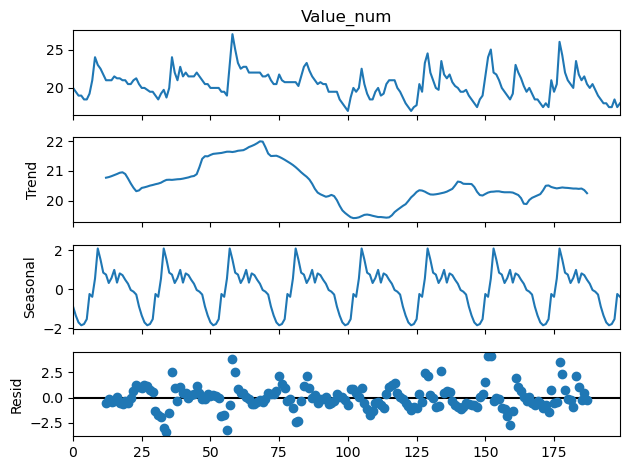

In [ ]:
decomposed = seasonal_decompose(df_t001_1h["Value_num"][:200], model="additive", period=24)
decomposed.plot()

##### ÜBUNG: EINFACHE VORHERSAGE
- Laden Sie aus ILIAS die Datensätze df_activity_30m und t001_1h herunter.
- Teilen Sie die Daten in 80% Trainingsdaten und 20% Testdaten auf.
- Implementieren Sie die Vorhersagemodelle Naive und Seasonal-Naive.
- Visualisieren Sie die Zeitseriendaten zusammen mit den Vorhersagen auf den Testdaten.
- Berechnen Sie den RMSE (Root Mean Squared Error) für beide Modelle.

In [84]:
# Calculate Root Mean Squared Error (RMSE)
def calculate_rmse(test: pd.DataFrame, train: pd.DataFrame) -> float:
    return np.sqrt(mean_squared_error(test, train))

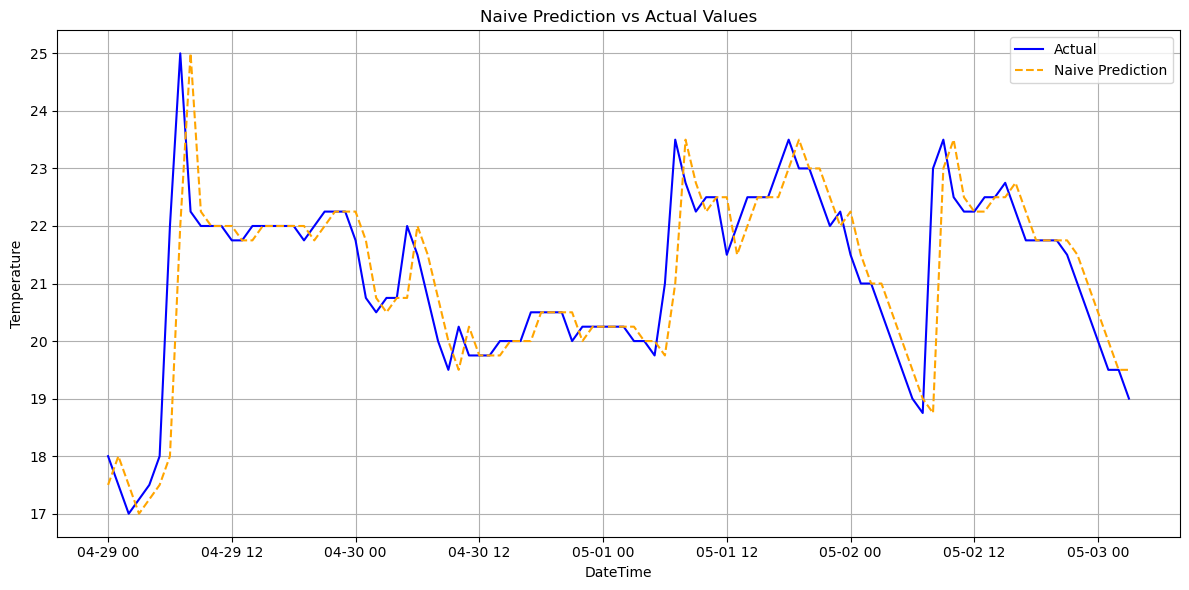

Root Mean Squared Error (RMSE) on test set: 0.865303414993839


In [85]:
# Splitting the DataFrame into 80/20 ratio
# Causes train and test DataFrame to be mixed. Shifting DateTime results in wrong (?) naive prediction
# train_t001_1h, test_t001_1h = train_test_split(df_t001_1h, test_size=0.2, random_state=42)

# Calculate split index for 80/20 split
split_index = int(len(df_t001_1h) * 0.8)
train_t001_1h = df_t001_1h.iloc[0:split_index]
test_t001_1h = df_t001_1h.iloc[split_index:]

# Limit data
train_t001_1h = train_t001_1h[:100]
test_t001_1h = test_t001_1h[:100]

# Ensure DataFrame is sorted by DateTime (important for time series)
train_t001_1h = train_t001_1h.sort_values(by="DateTime_ISO8601").reset_index(drop=True)
test_t001_1h = test_t001_1h.sort_values(by="DateTime_ISO8601").reset_index(drop=True)

train_t001_1h["naive_prediciton"] = train_t001_1h["Value_num"].shift(1)

# Prepare test set with predictions
# Use the last value of train as the initial prediction for the test set
last_train_value = train_t001_1h["Value_num"].iloc[-1]
test_t001_1h["Naive_Prediction"] = test_t001_1h["Value_num"].shift(1)
test_t001_1h.iloc[0, test_t001_1h.columns.get_loc("Naive_Prediction")] = last_train_value

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_t001_1h["DateTime_ISO8601"], test_t001_1h["Value_num"], label="Actual", color="blue")
plt.plot(
    test_t001_1h["DateTime_ISO8601"],
    test_t001_1h["Naive_Prediction"],
    label="Naive Prediction",
    color="orange",
    linestyle="--",
)

plt.title("Naive Prediction vs Actual Values")
plt.xlabel("DateTime")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calculate Root Mean Squared Error (RMSE)
rmse = calculate_rmse(test_t001_1h["Value_num"], test_t001_1h["Naive_Prediction"])
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")